In [1]:
#Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing(as_frame=True)
df = data.frame

In [2]:
#Вивести 5 перших рядків.
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
df.isnull().sum()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [4]:
#Перевірити наявність дублікатів, при виявленні - видалити.
duplicates = df.duplicated()
duplicates.sum()

0

In [5]:
#Вивести унікальні значення.
unique_house_ages = df['HouseAge'].unique()

print("Унікальні значення в стовпчику 'HouseAge':")
print(unique_house_ages)

Унікальні значення в стовпчику 'HouseAge':
[41. 21. 52. 42. 50. 40. 49. 48. 51. 43.  2. 46. 26. 20. 17. 36. 19. 23.
 38. 35. 10. 16. 27. 39. 31. 29. 22. 37. 28. 34. 32. 47. 44. 30. 18. 45.
 33. 24. 15. 14. 13. 25.  5. 12.  6.  8.  9.  7.  3.  4. 11.  1.]


In [6]:
#Перевірити тип даних.
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


Кореляції в порядку спадання:
AveRooms     AveBedrms      0.847621
AveBedrms    AveRooms       0.847621
MedHouseVal  MedInc         0.688075
MedInc       MedHouseVal    0.688075
             AveRooms       0.326895
                              ...   
HouseAge     AveRooms      -0.153277
Population   HouseAge      -0.296244
HouseAge     Population    -0.296244
Longitude    Latitude      -0.924664
Latitude     Longitude     -0.924664
Length: 72, dtype: float64


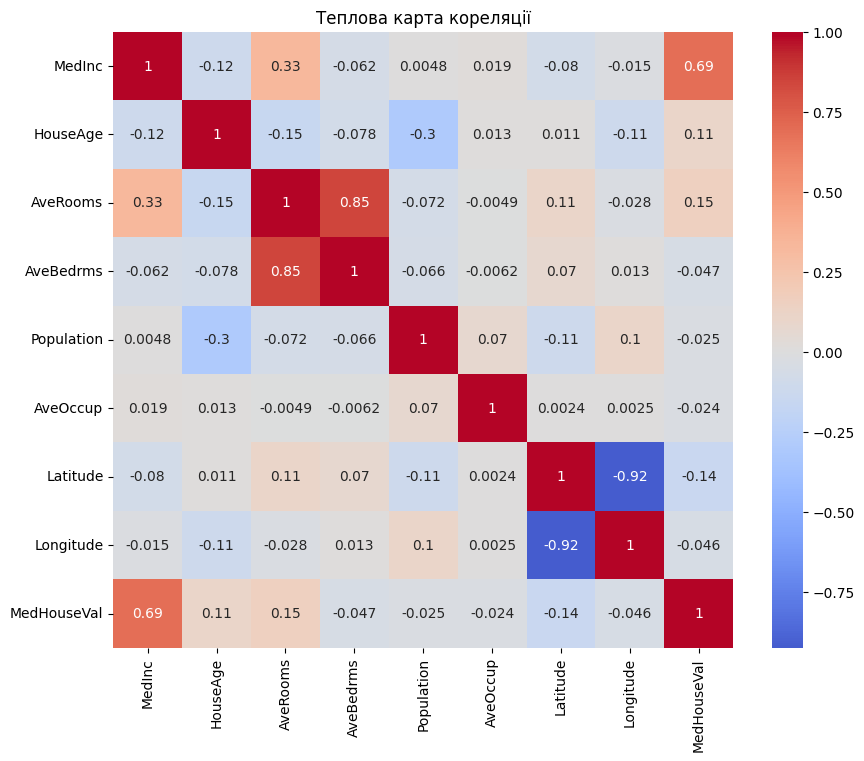

In [7]:
#Обчислити кореляцію між всіма ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції.
correlation_matrix = df.corr()
correlation_sorted = correlation_matrix.unstack().sort_values(ascending=False)
correlation_sorted = correlation_sorted[correlation_sorted != 1.0]

print("Кореляції в порядку спадання:")
print(correlation_sorted)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Теплова карта кореляції")
plt.show()

In [8]:
#Поділити дані на тренувальні і тестові.
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір тренувального набору:", X_train.shape)
print("Розмір тестового набору:", X_test.shape)

Розмір тренувального набору: (16512, 8)
Розмір тестового набору: (4128, 8)


In [9]:
#Масштабувати ознаки.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Перші 5 рядків після масштабування (тренувальний набір):")
print(X_train_scaled_df.head())

print("\nПерші 5 рядків після масштабування (тестовий набір):")
print(X_test_scaled_df.head())

Перші 5 рядків після масштабування (тренувальний набір):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
2  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280 -0.460146   
3 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507 -1.382172   
4 -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832  0.532084   

   Longitude  
0   1.272587  
1   0.709162  
2  -0.447603  
3   1.232698  
4  -0.108551  

Перші 5 рядків після масштабування (тестовий набір):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -1.155085 -0.286324 -0.520686  -0.171746   -0.030301  0.067408  0.195100   
1 -0.708659  0.110435 -0.165815   0.223472    0.121851 -0.036030 -0.235491   
2 -0.210402  1.856173 -0.610765   0.205892   -0.102419 -0.149989  1.009478   
3  0.975113 -0.921

In [12]:
#Побудувати 3 моделі: лін. регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSearch.
#Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Регресія випадковий ліс
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Ridge регресія
ridge_reg = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ridge_reg = grid_search.best_estimator_
y_pred_ridge = best_ridge_reg.predict(X_test)

Лінійна регресія R^2: 0.58
Лінійна регресія MSE: 0.56
Регресія випадковий ліс R^2: 0.81
Регресія випадковий ліс MSE: 0.26
Ridge регресія R^2: 0.58
Ridge регресія MSE: 0.56


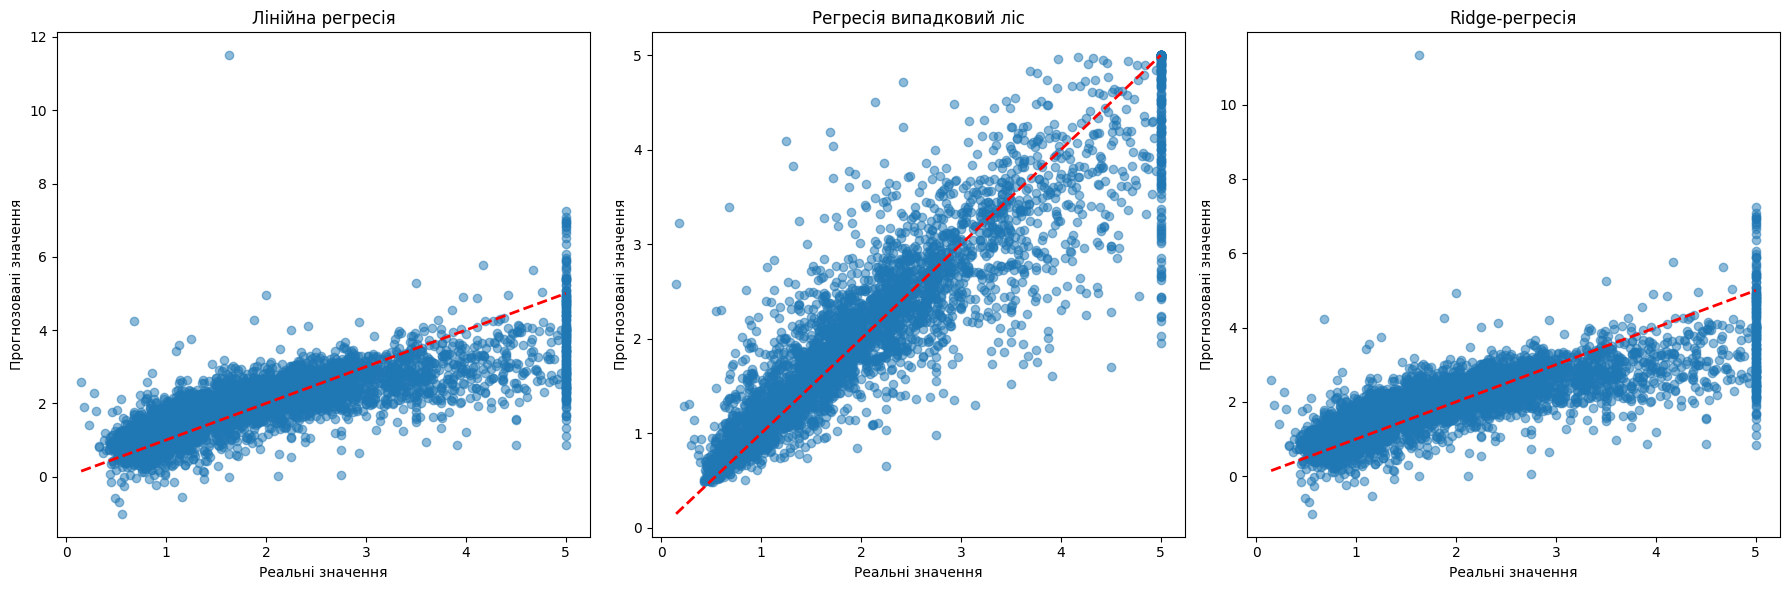

In [14]:
#Вивести R^2 і MSE. Побудувати графіки.
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} R^2: {r2_score(y_true, y_pred):.2f}")
    print(f"{model_name} MSE: {mean_squared_error(y_true, y_pred):.2f}")

print_metrics(y_test, y_pred_lin, "Лінійна регресія")
print_metrics(y_test, y_pred_rf, "Регресія випадковий ліс")
print_metrics(y_test, y_pred_ridge, "Ridge регресія")
plt.figure(figsize=(18, 6))

# Графік для Лінійної регресії
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Лінійна регресія')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')

# Графік для Регресії випадковий ліс
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Регресія випадковий ліс')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')

# Графік для Ridge-регресії
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Ridge-регресія')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')

plt.tight_layout()
plt.show()

In [ ]:
#Висновок: Відповідно до результатів, моделі можуть відрізнятися за своїми прогнозувальними можливостями.
#Випадковий ліс, ймовірно, продемонструє найкращу продуктивність завдяки своїй здатності справлятися з нелінійними відносинами і великою кількістю ознак.
#Лінійна регресія є простішою моделлю і може бути корисною як базова модель.
#Ridge-регресія є корисною для регуляризації і запобігання переобученню, що може бути важливим, коли дані містять багато ознак.
#Графіки, що порівнюють реальні і прогнозовані значення, допомагають візуально оцінити якість кожної моделі.
#Чим ближче точки до діагональної червоної лінії, тим точніші прогнози моделі.
#Посилання на гітхаб: https://github.com/nastiadzen/Machine-learning